# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [68]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE. Tuy nhiên trong Asm này, học viên chỉ cần xử lý từ ngày đầu đến ngày 8/4/2021.

In [70]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [71]:
# Nhận code bạn tại đây để confirmed_df chỉ chưa dữ liệu đến ngày 8/4/2021
confirmed_df = confirmed_df.loc[:,:'4/8/21']
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108


In [72]:
# Nhận code bạn tại đây để deaths_df chỉ chưa dữ liệu đến ngày 8/4/2021
deaths_df = deaths_df.loc[:,:'4/8/21']

deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,115,115,115,116,117,117,117,117,119,120
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,536,537,538,538,540,542,543,547,547,549


In [73]:
# Nhận code bạn tại đây để recoveries_df chỉ chưa dữ liệu đến ngày 8/4/2021
recoveries_df = recoveries_df.loc[:,:'4/8/21']

recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,51473,51550,51788,51798,51802,51885,51902,51928,51940,51956
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,90617,91271,91875,92500,93173,93842,94431,95035,95600,96129
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,81442,81538,81632,81729,81813,81896,81994,82096,82192,82289
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11276,11315,11365,11401,11428,11474,11523,11570,11616,11692
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20446,20493,20508,20867,20871,20879,21452,21489,21545,21557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,213590,215429,217224,217224,220418,222007,223249,224552,226090,227988
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1667,1676,1682,1691,1715,1738,1772,1822,1886,1946
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,84519,84592,84698,84825,85017,85068,85178,85338,85409,85446


#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [74]:
# Nhập code ở đây:
start_date = confirmed_df.columns[4]
start_date

'1/22/20'

    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [75]:
# Nhập code ở đây:
last_date = confirmed_df.columns[-1]
last_date

'4/8/21'

    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [76]:
# Nhập code ở đây:
country_count = confirmed_df['Country/Region'].nunique()
country_count

201

    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [77]:
# Nhập code ở đây:
day_count = len(confirmed_df.axes[1]) - 4 
day_count

443

    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [78]:
# Nhập code ở đây (confirmed_df):
duplicated_confirmed_country = confirmed_df[confirmed_df['Country/Region'].duplicated()]
duplicated_confirmed_country['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

In [79]:
# Nhập code ở đây (deaths_df):
duplicated_deaths_country = deaths_df[deaths_df['Country/Region'].duplicated()]
duplicated_deaths_country['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

In [80]:
# Nhập code ở đây (recoveries_df):
duplicated_recoveries_country = recoveries_df[recoveries_df['Country/Region'].duplicated()]
duplicated_recoveries_country['Country/Region'].unique()

array(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [81]:
# Nhập code ở đây (recoveries_df):
Countrywide_stored = recoveries_df['Country/Region'][recoveries_df['Province/State'].isnull()]
print(Countrywide_stored.unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' '

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [82]:
# Nhập code ở đây (recoveries_df):
Citywide_stored = recoveries_df['Country/Region'][~recoveries_df['Province/State'].isnull()]
print(Citywide_stored.unique())

['Australia' 'China' 'Denmark' 'France' 'Netherlands' 'New Zealand'
 'United Kingdom']


    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [83]:
# Nhập code ở đây:
most_case_country = confirmed_df.sort_values(last_date,ascending=False)['Country/Region'].iloc[0]
print('Country has the most case is', most_case_country, 'at', last_date) 

Country has the most case is US at 4/8/21


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [84]:
# Nhập code ở đây:

most_death_country = deaths_df.sort_values(last_date,ascending=False)['Country/Region'].iloc[0]
most_death_country

'US'

    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [85]:
# Nhập code ở đây:
Vietnam_case = confirmed_df[confirmed_df['Country/Region'].str.contains('Vietnam')][last_date].iloc[0]
print('Number of Case in Vietnam is', Vietnam_case)
Vietnam_deaths = deaths_df[deaths_df['Country/Region'].str.contains('Vietnam')][last_date].iloc[0]
print('Number of Death in Vietnam is', Vietnam_deaths)
Vietnam_recoveries = recoveries_df[recoveries_df['Country/Region'].str.contains('Vietnam')][last_date].iloc[0]
print('Number of Recovery in Vietnam is', Vietnam_recoveries)
print('Number of Case left is', Vietnam_case - Vietnam_deaths - Vietnam_recoveries)

Number of Case in Vietnam is 2668
Number of Death in Vietnam is 35
Number of Recovery in Vietnam is 2429
Number of Case left is 204


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [86]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập code ở đây:
total_cases_elapsed = confirmed.sum(axis=0)
total_deaths_elapsed = deaths.sum(axis=0)
total_recoveries_elapsed = recoveries.sum(axis=0)
mortality_rate_elapsed = total_deaths_elapsed/total_cases_elapsed
recovery_rate_elapsed = total_recoveries_elapsed/total_cases_elapsed
total_active_elapsed = total_cases_elapsed - total_deaths_elapsed - total_recoveries_elapsed 


In [87]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases_elapsed[-1])
print("Total death cases: ", total_deaths_elapsed[-1])
print("Total recoveries cases: ", total_recoveries_elapsed[-1])
print("Total active cases: ", total_active_elapsed[-1])

Total confirmed cases:  134409344
Total death cases:  3024749
Total recoveries cases:  76094849
Total active cases:  55289746


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

<function matplotlib.pyplot.show(close=None, block=None)>

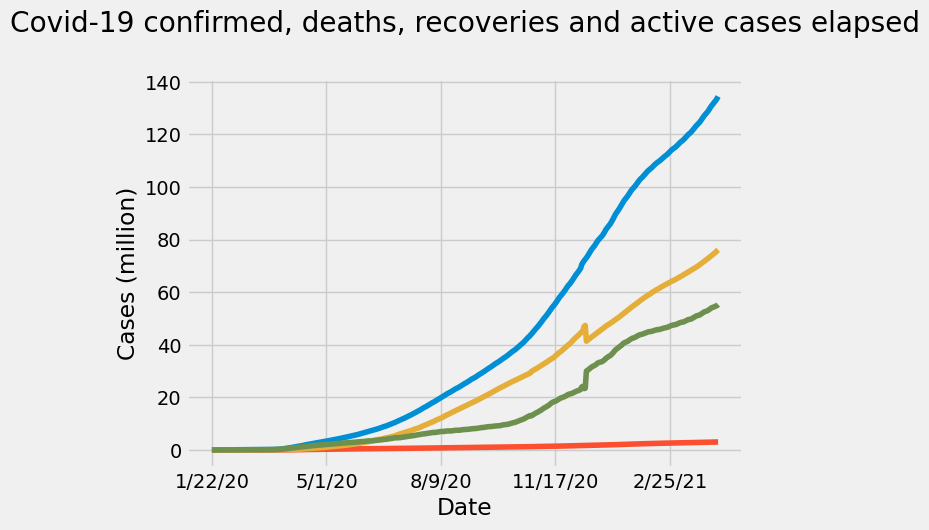

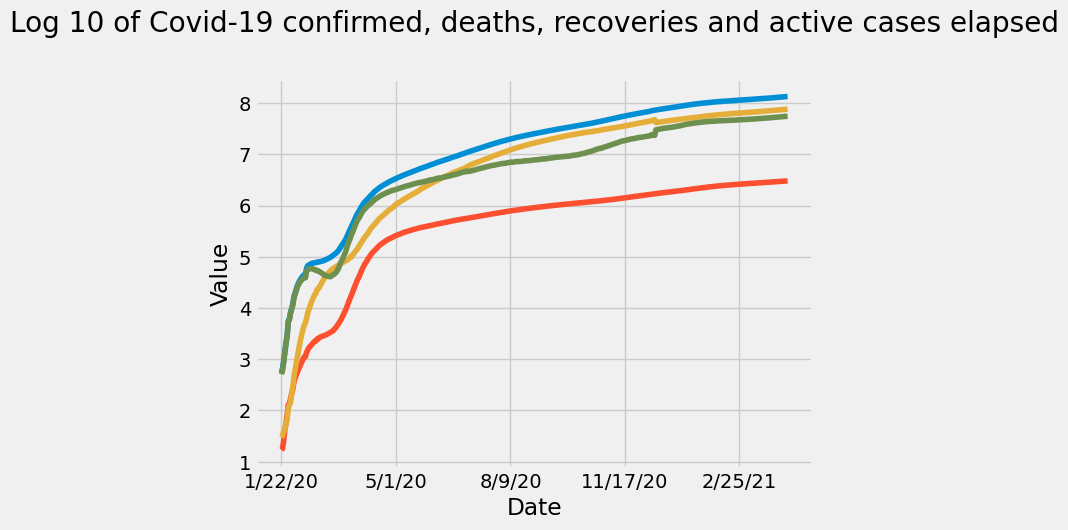

In [88]:
#Nhập code ở đây
cases_log10 = np.log10(total_cases_elapsed)
deaths_log10 = np.log10(total_deaths_elapsed)
recoveries_log10 = np.log10(total_recoveries_elapsed)
active_log10 = np.log10(total_active_elapsed)

plt.figure()
(total_cases_elapsed/1000000).plot(kind = 'line')
(total_deaths_elapsed/1000000).plot(kind = 'line')
(total_recoveries_elapsed/1000000).plot(kind = 'line')
(total_active_elapsed/1000000).plot(kind = 'line')
plt.title('Covid-19 confirmed, deaths, recoveries and active cases elapsed', y=1.1)
plt.ylabel('Cases (million)')
plt.xlabel('Date')

plt.figure()
cases_log10.plot()
deaths_log10.plot()
recoveries_log10.plot()
active_log10.plot()
plt.title('Log 10 of Covid-19 confirmed, deaths, recoveries and active cases elapsed', y=1.1)
plt.ylabel('Value')
plt.xlabel('Date')
plt.show

## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

<function matplotlib.pyplot.show(close=None, block=None)>

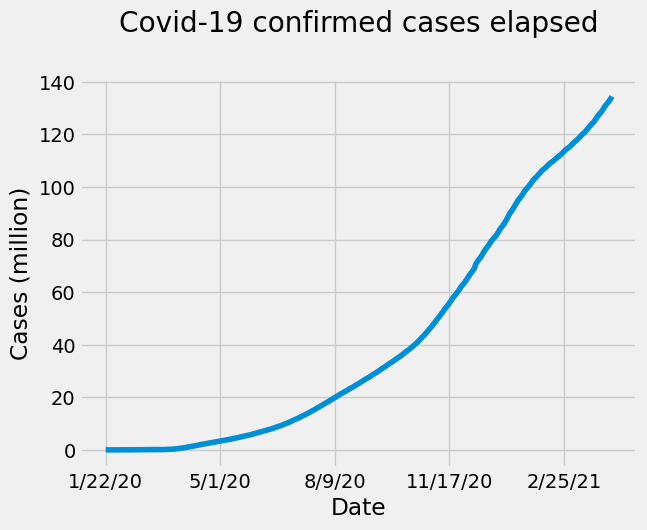

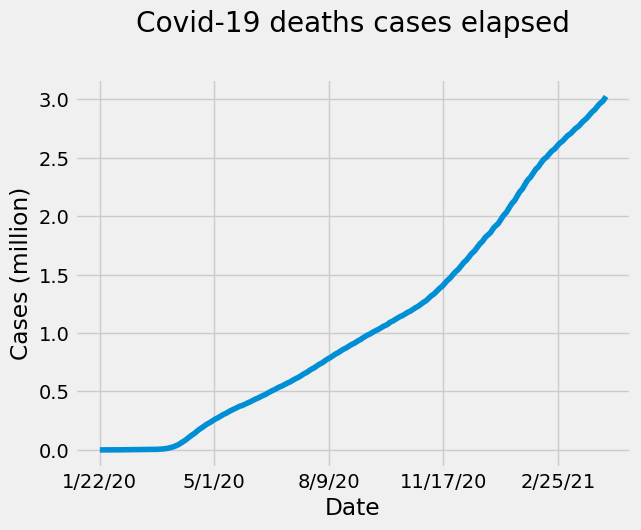

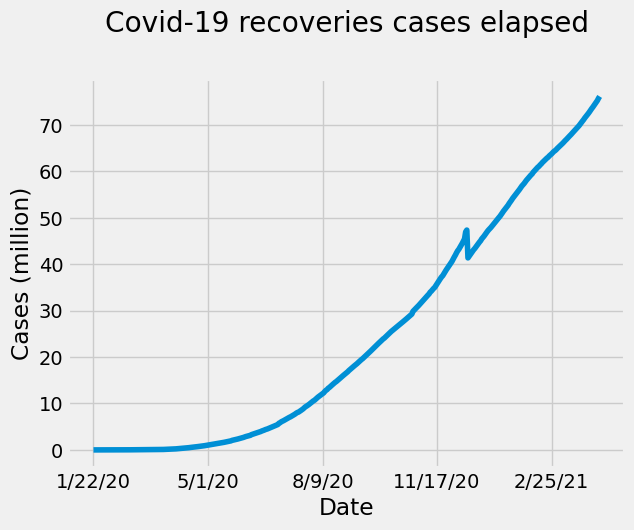

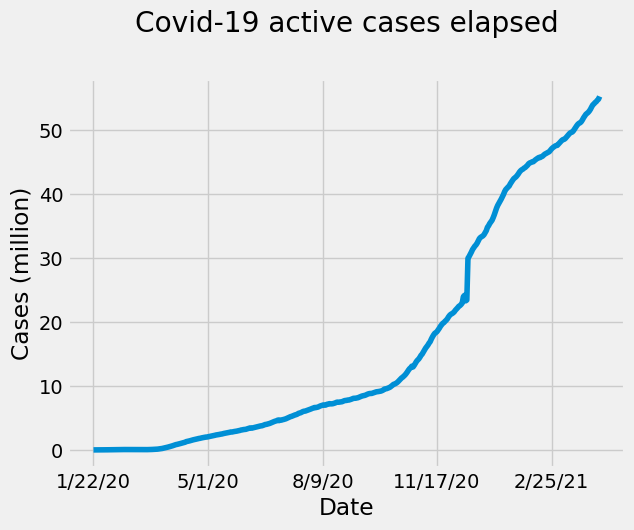

In [89]:
#Nhập code ở đây:
plt.figure()
(total_cases_elapsed/1000000).plot(kind = 'line')
plt.title('Covid-19 confirmed cases elapsed', y=1.1)
plt.ylabel('Cases (million)')
plt.xlabel('Date')

plt.figure()
(total_deaths_elapsed/1000000).plot(kind = 'line')
plt.title('Covid-19 deaths cases elapsed', y=1.1)
plt.ylabel('Cases (million)')
plt.xlabel('Date')

plt.figure()
(total_recoveries_elapsed/1000000).plot(kind = 'line')
plt.title('Covid-19 recoveries cases elapsed', y=1.1)
plt.ylabel('Cases (million)')
plt.xlabel('Date')

plt.figure()
(total_active_elapsed/1000000).plot(kind = 'line')
plt.title('Covid-19 active cases elapsed', y=1.1)
plt.ylabel('Cases (million)')
plt.xlabel('Date')

plt.show

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

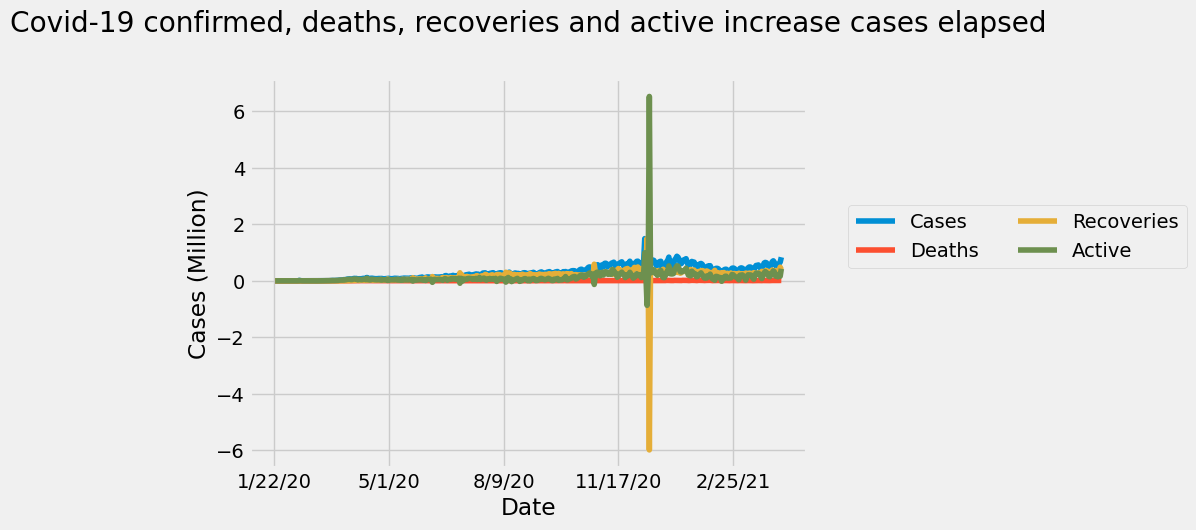

In [90]:
#Nhập code ở đây:
total_cases_increase_elapsed= total_cases_elapsed.diff()
total_deaths_increase_elapsed= total_deaths_elapsed.diff()
total_recoveries_increase_elapsed= total_recoveries_elapsed.diff()
total_active_increase_elapsed= total_active_elapsed.diff()


(total_cases_increase_elapsed/1000000).plot(kind = 'line',label='Cases')
(total_deaths_increase_elapsed/1000000).plot(kind = 'line', label='Deaths')
(total_recoveries_increase_elapsed/1000000).plot(kind = 'line', label='Recoveries')
(total_active_increase_elapsed/1000000).plot(kind = 'line', label = 'Active')
plt.title('Covid-19 confirmed, deaths, recoveries and active increase cases elapsed', y=1.1)
plt.ylabel('Cases (Million)')
plt.xlabel('Date')
plt.legend( ncol = 2, bbox_to_anchor = (0.7,1,1,-0.3))
plt.show()

## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

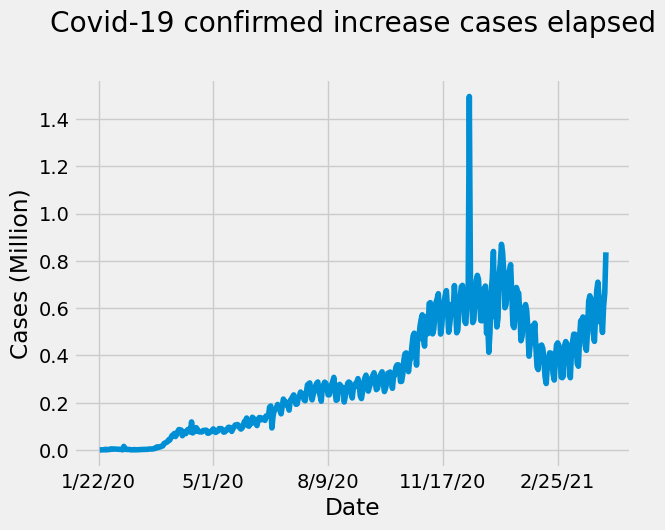

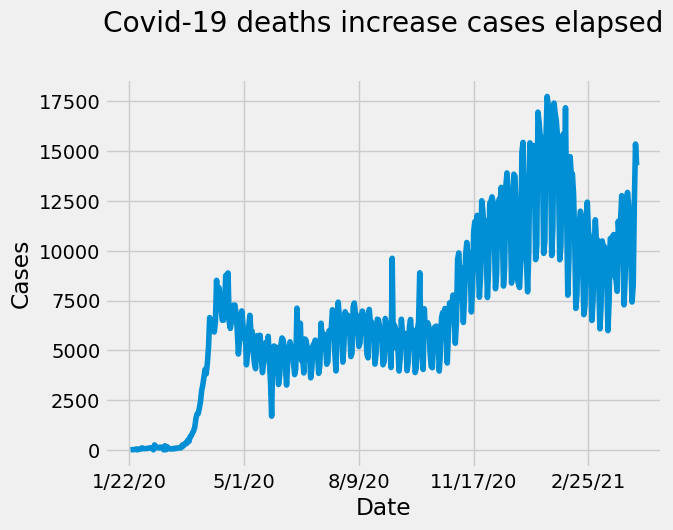

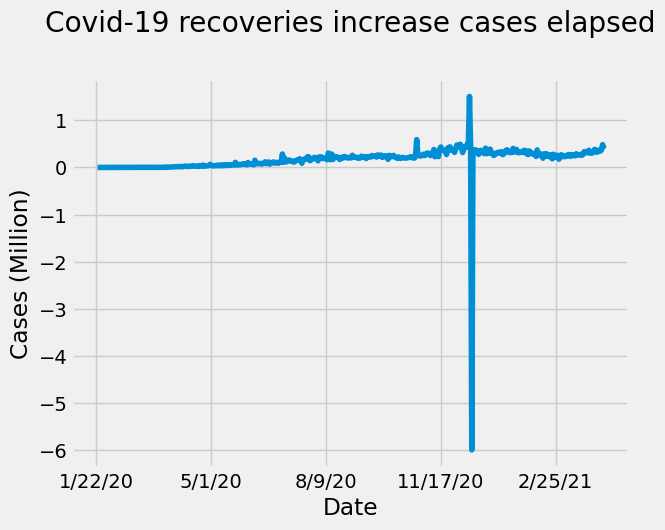

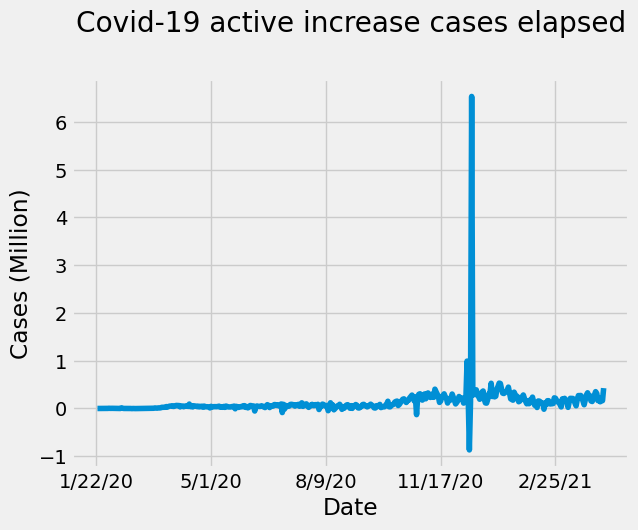

In [91]:
#Nhập code ở đây:
plt.figure()
(total_cases_increase_elapsed/1000000).plot(kind = 'line',label='Cases')
plt.title('Covid-19 confirmed increase cases elapsed', y=1.1)
plt.ylabel('Cases (Million)')
plt.xlabel('Date')


plt.figure()
(total_deaths_increase_elapsed).plot(kind = 'line', label='Deaths')
plt.title('Covid-19 deaths increase cases elapsed', y=1.1)
plt.ylabel('Cases')
plt.xlabel('Date')


plt.figure()
(total_recoveries_increase_elapsed/1000000).plot(kind = 'line', label='Recoveries')
plt.title('Covid-19 recoveries increase cases elapsed', y=1.1)
plt.ylabel('Cases (Million)')
plt.xlabel('Date')


plt.figure()
(total_active_increase_elapsed/1000000).plot(kind = 'line', label = 'Active')
plt.title('Covid-19 active increase cases elapsed', y=1.1)
plt.ylabel('Cases (Million)')
plt.xlabel('Date')


plt.show()

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [92]:
#Nhập code ở đây:
mortality_rate_elapsed
recovery_rate_elapsed

1/22/20    0.053860
1/23/20    0.048706
1/24/20    0.041314
1/25/20    0.029228
1/26/20    0.026415
             ...   
4/4/21     0.565215
4/5/21     0.565720
4/6/21     0.565918
4/7/21     0.566727
4/8/21     0.566143
Length: 443, dtype: float64

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

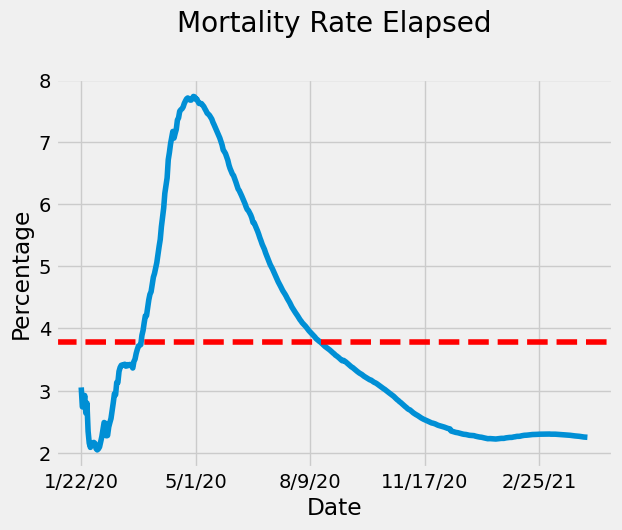

In [93]:
#Nhập code ở đây:
average_mortality_rate = sum(mortality_rate_elapsed*100)/len(mortality_rate_elapsed)
(mortality_rate_elapsed*100).plot(kind='line')
plt.title('Mortality Rate Elapsed', y=1.1)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.axhline(y=average_mortality_rate, color = 'r',linestyle='--')
plt.show()


**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

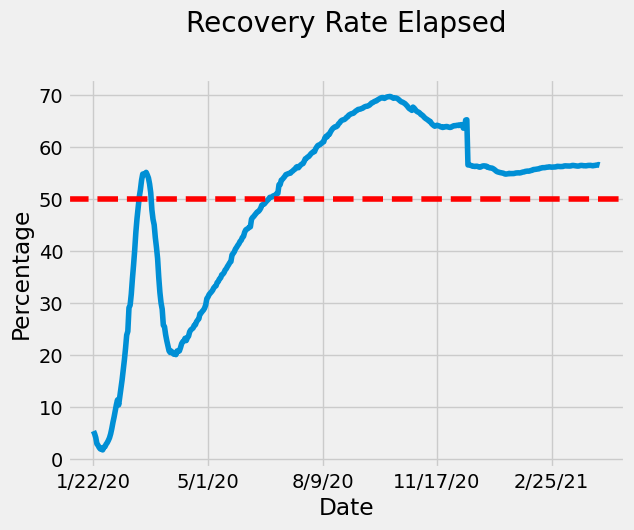

In [94]:
#Nhập code ở đây:
average_recovery_rate = sum(recovery_rate_elapsed*100)/len(recovery_rate_elapsed)
(recovery_rate_elapsed*100).plot(kind='line')
plt.title('Recovery Rate Elapsed', y=1.1)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.axhline(y=average_recovery_rate, color = 'r',linestyle='--')
plt.show()

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [95]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [96]:
#Nhập code ở đây:
confirmed_df.insert(loc = 2, column = 'Continent', value = confirmed_df['Country/Region'].apply(country_to_continent_code))
deaths_df.insert(loc = 2, column = 'Continent', value = deaths_df['Country/Region'].apply(country_to_continent_code))
recoveries_df.insert(loc = 2, column = 'Continent', value = recoveries_df['Country/Region'].apply(country_to_continent_code))


## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [97]:
#Nhập code ở đây:
country_df = confirmed_df[['Country/Region','Continent', '4/8/21']]
country_df = country_df.rename(columns={'4/8/21': 'Confirmed'})
country_df.insert(3, 'Deaths', deaths_df['4/8/21'].to_list())
country_df.insert(4, 'Lat', deaths_df['Lat'].to_list())
country_df.insert(5, 'Long', deaths_df['Long'].to_list())

country_df = pd.merge(country_df, recoveries_df[['Lat','4/8/21']], on = 'Lat')
country_df.set_index('Country/Region', inplace=True)
country_df = country_df.rename(columns={'4/8/21': 'Recoveries'})


country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Mortality Rate (%)'] = (country_df['Deaths']/country_df['Confirmed'])*100
country_df

,Continent,Confirmed,Deaths,Lat,Long,Recoveries,Active,Mortality Rate (%)
Country/Region,,,,,,,,
Afghanistan,AS,56943,2516,33.939110,67.709953,51956,2471,4.418454
Albania,EU,127509,2297,41.153300,20.168300,96129,29083,1.801441
Algeria,AF,118116,3119,28.033900,1.659600,82289,32708,2.640624
Andorra,EU,12409,120,42.506300,1.521800,11692,597,0.967040
Angola,AF,23108,549,-11.202700,17.873900,21557,1002,2.375801
...,...,...,...,...,...,...,...,...
West Bank and Gaza,na,262017,2781,31.952200,35.233200,227988,31248,1.061382
Winter Olympics 2022,na,0,0,39.904200,116.407400,0,0,NaN
Yemen,AS,5133,1004,15.552727,48.516388,1946,2183,19.559712


## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [98]:
#Nhập code ở đây:
continents_df = country_df.groupby('Continent')[['Confirmed','Deaths','Recoveries','Active']].sum()
continents_df['Mortality Rate (%)'] = (continents_df['Deaths']/continents_df['Confirmed'])*100
continents_df.index.rename('continent', inplace=True)
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate (%)
continent,,,,,
AF,4249783,114147,3799137,336499,2.685949
AS,29985622,437804,26895159,2652659,1.460046
EU,41525487,968949,21164255,19392283,2.333384
NA,34864453,791018,3031402,31042033,2.268838
OC,39887,1007,26447,12433,2.524632
SA,22104794,678496,19708848,1717450,3.069452
na,501921,7985,441593,52343,1.590888


## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [99]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

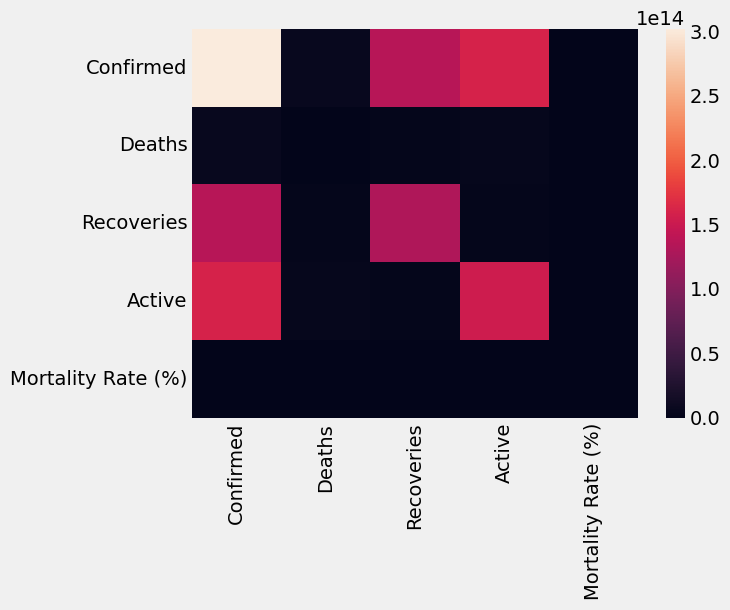

In [102]:
cov_matrix = continents_df.cov()

sns.heatmap(cov_matrix)

plt.show()

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

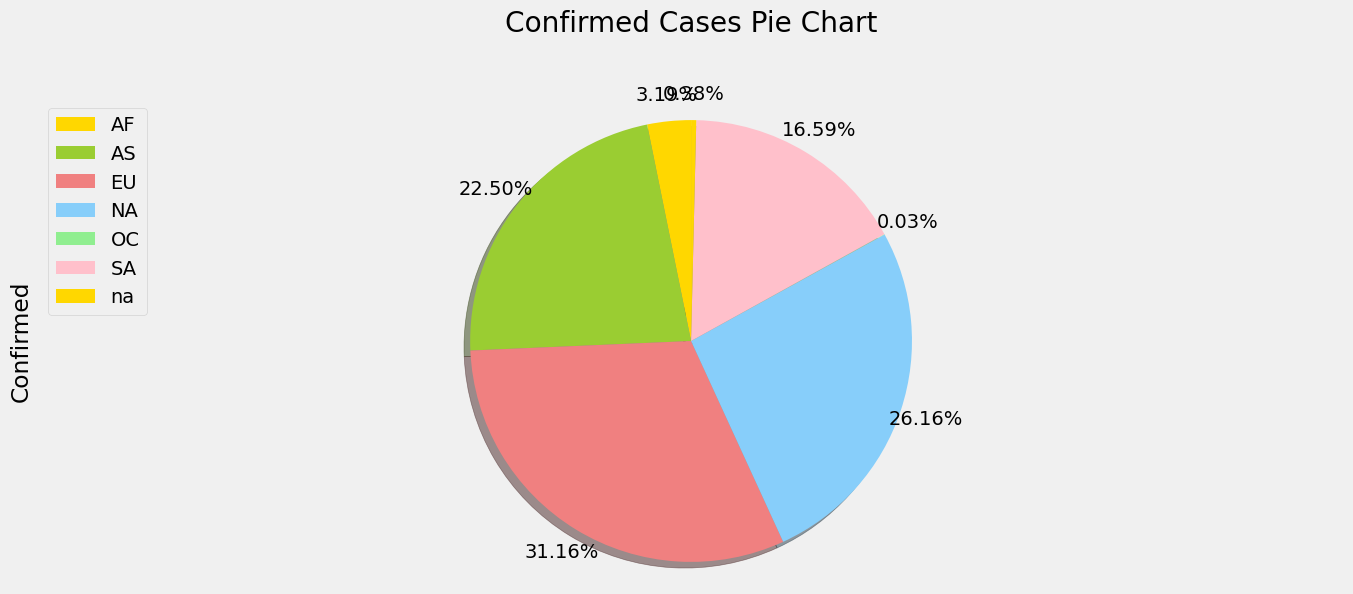

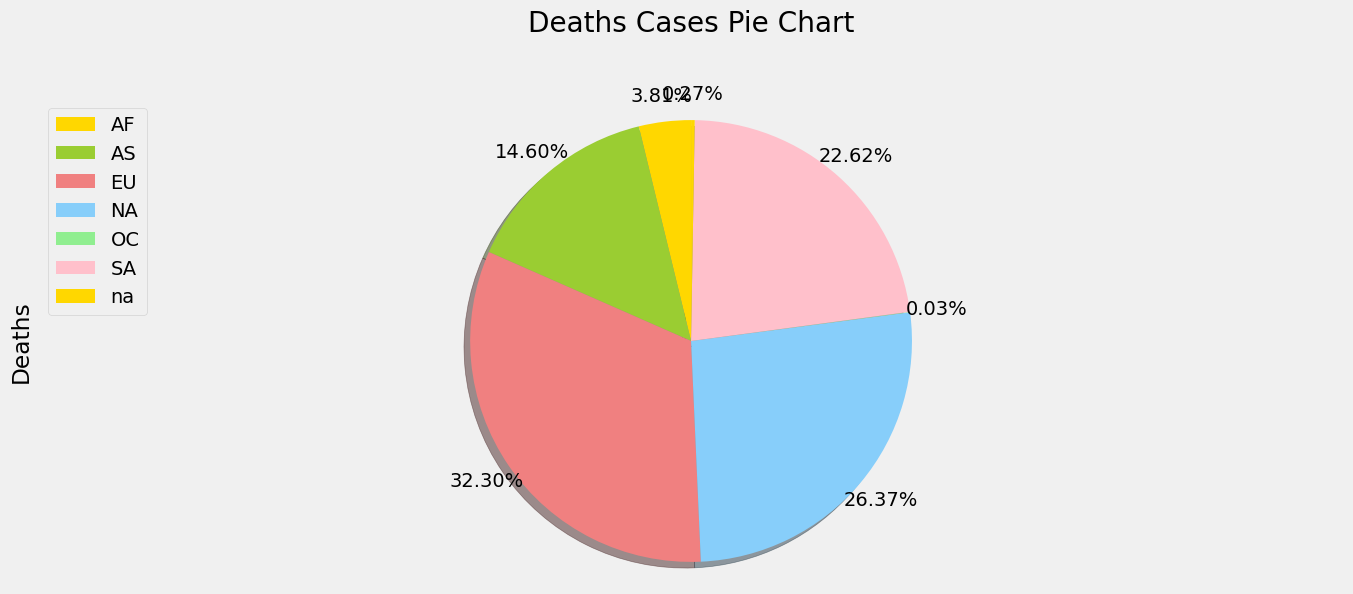

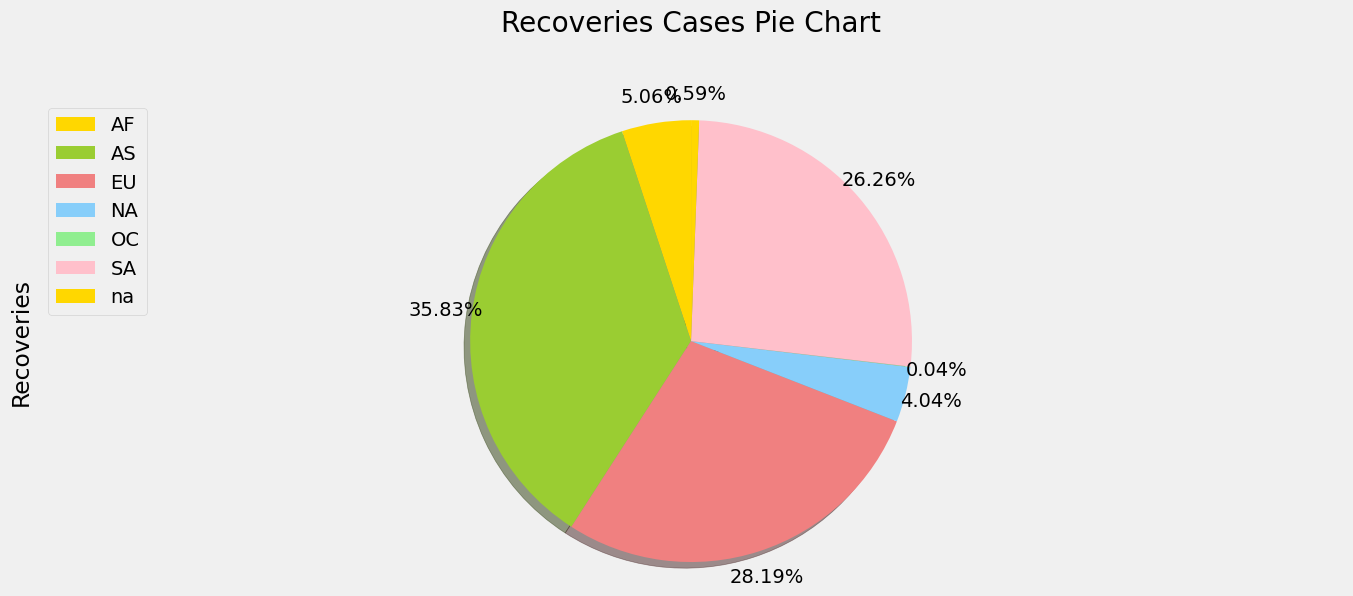

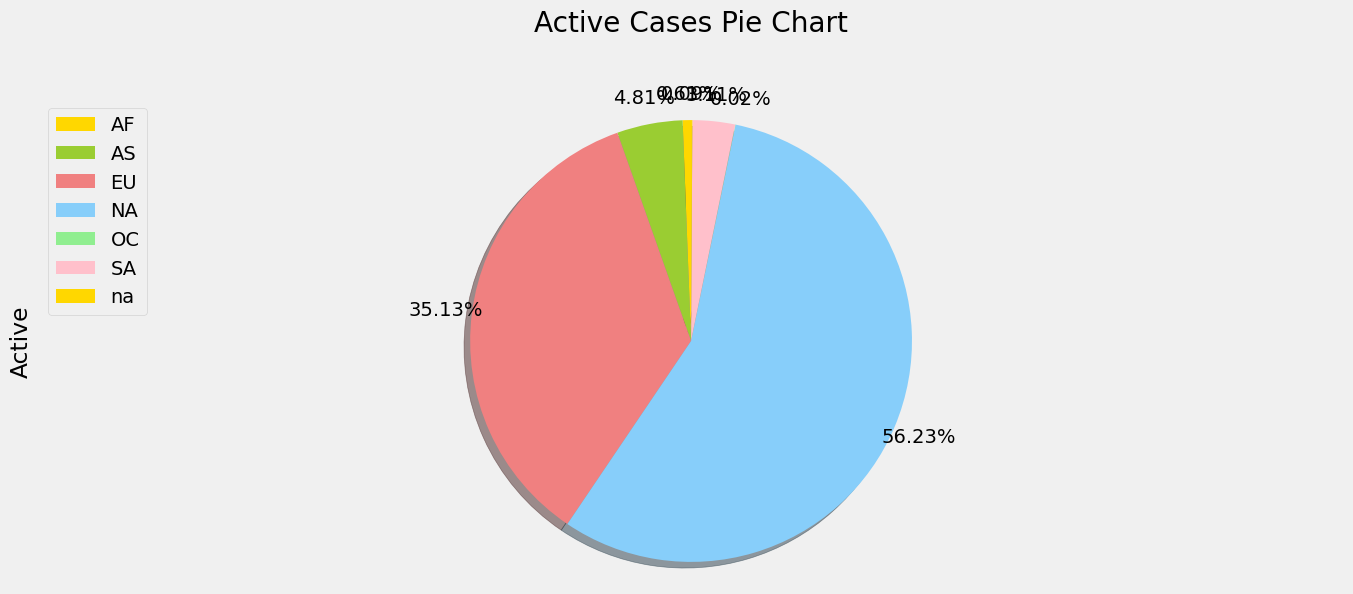

In [103]:
#Nhập code ở đây:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

p13 = continents_df.loc[:,:'Active'].columns.tolist()
for i in p13:
  continents_df[i].plot(kind='pie',
                        figsize=(15, 6),
                            autopct='%1.2f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list
                            )
  plt.title(f'{i} Cases Pie Chart', y= 1.12)
  plt.axis('equal')
  plt.legend(labels=continents_df.index, loc='upper left') 
  plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


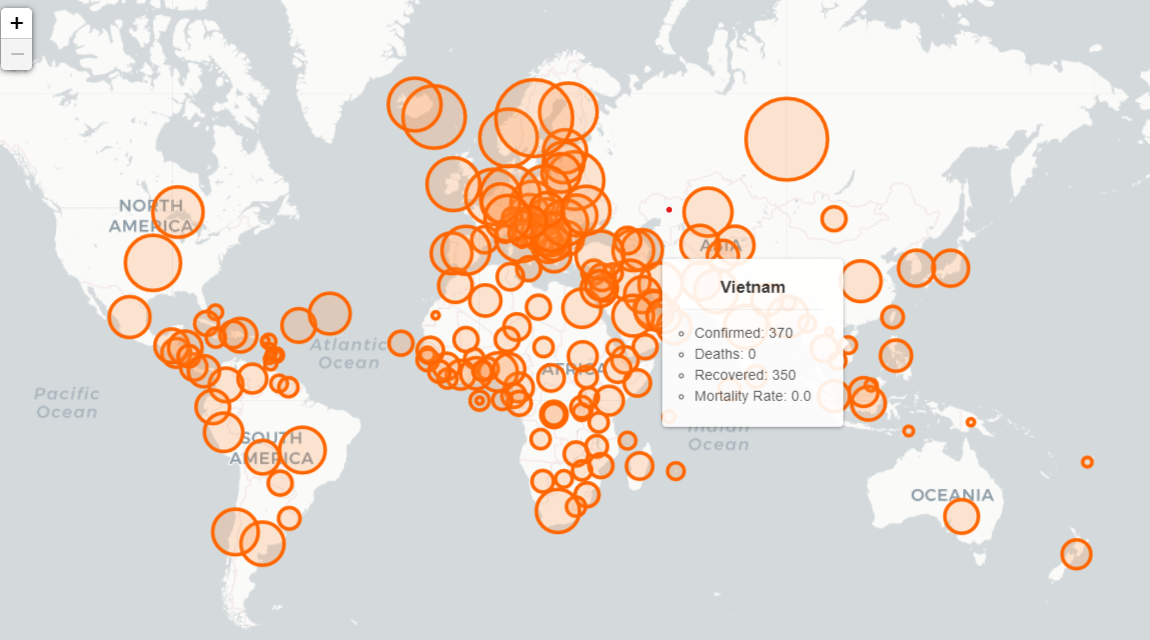

In [104]:
#Nhập code ở đây:
country_df_folium = country_df.dropna(subset = ['Lat','Long'])
country_df_folium.reset_index(inplace=True)
country_df_folium
map = folium.Map(location=[country_df_folium['Lat'].mean(), country_df_folium['Long'].mean()], zoom_start = 3)

for _, row in country_df_folium.iterrows():
    tooltip_text = f"Country Name: {row['Country/Region']}, Confirmed: {row['Confirmed']}, Deaths: {row['Deaths']}, Mortality Rate: {row['Mortality Rate (%)']}"
    tooltip = folium.Tooltip(tooltip_text)

    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=row['Confirmed'] / 200000, min_radius = row['Confirmed'] / 300000, max_radius = row['Confirmed'] / 100000,
        fill=True,
        fill_color='#3186cc',
        color='red',
        weight=False,
        tooltip = tooltip
    ).add_to(map)

map


## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [105]:
#Nhập code ở đây:
country_df_15 = country_df['Active']
country_df_15_log10 = np.log10(country_df_15)
country_df_15_log10.replace([np.inf, -np.inf], 0, inplace=True)
country_df_15_log10 = country_df_15_log10.to_frame()
country_df_15_log10.reset_index(inplace = True)
fig = go.Figure(data=go.Choropleth(
    locations=country_df_15_log10['Country/Region'],
    locationmode='country names',
    z=country_df_15_log10['Active'],
    colorscale='Viridis',
    colorbar_title='Active'
))

fig.update_layout(
    title='Active Case Log10 by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log10



## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [114]:
#Nhập code ở đây:
bt16 = country_df.sort_values('Confirmed', ascending = False)
bt16 = bt16.head(10)
bt16

,Continent,Confirmed,Deaths,Lat,Long,Recoveries,Active,Mortality Rate (%)
Country/Region,,,,,,,,
USA,NA,31119772,556312,40.000000,-100.000000,0,30563460,1.787648
Brazil,SA,13297270,345544,-14.235000,-51.925300,11668734,1282992,2.598609
India,AS,13060542,167642,20.593684,78.962880,11913292,979608,1.283576
France,EU,4903965,97422,46.227600,2.213700,274401,4532142,1.986597
Russia,EU,4563026,100158,61.524010,105.318756,4190701,272167,2.194991
United Kingdom,EU,4370321,153113,55.378100,-3.436000,0,4217208,3.503473
Italy,EU,3717602,112861,41.871940,12.567380,3060411,544330,3.035855
Turkey,AS,3689866,33201,38.963700,35.243300,3232892,423773,0.899789
Spain,EU,3336637,76179,40.463667,-3.749220,150376,3110082,2.283107


## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

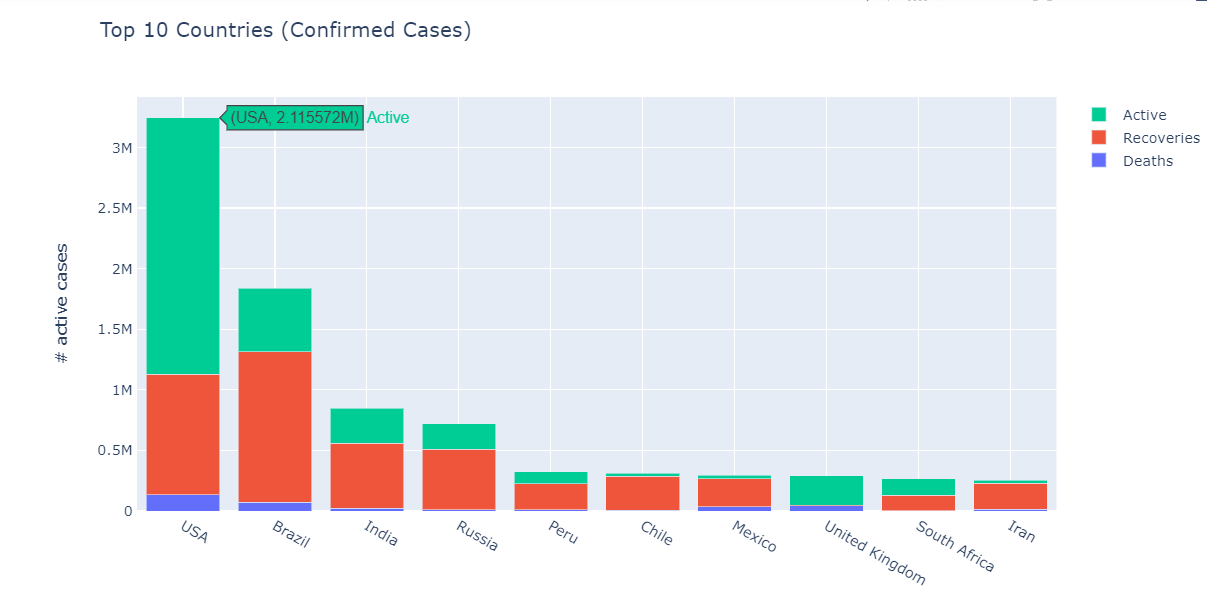

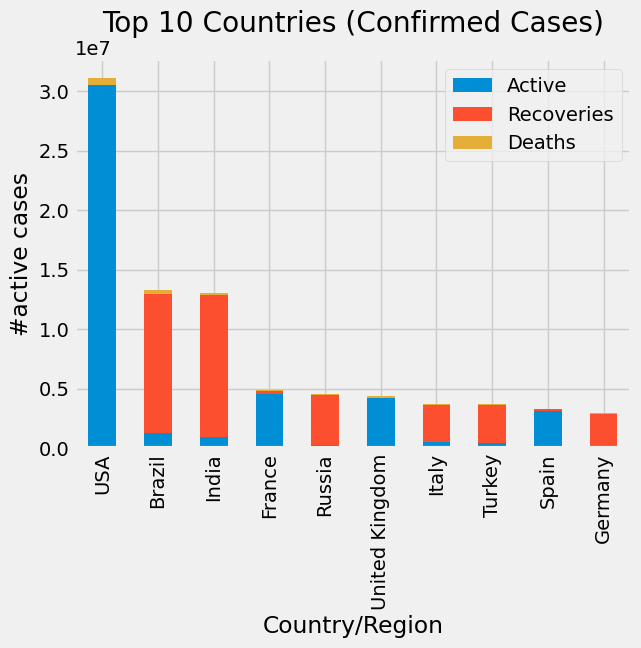

In [116]:
#Nhập code ở đây:
bt16[['Active', 'Recoveries', 'Deaths']].plot(kind='bar', stacked=True)

# Set title and axis labels
plt.title('Top 10 Countries (Confirmed Cases)')

plt.ylabel('#active cases')

# Show the plot
plt.show()